**Product pupularity based system targeted at new customers**

Using a dataset of past transactions (articles that have been bought by different customers), we use the frequency of purchase of each item to recommend popular products to new customers about whom we know nothing yet.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

# Uncomment this if you want to run this in Google Colab
# from google.colab import files
# import io 

In [2]:
# Load the transactions dataset

# In Jupyter
transactions = pd.read_csv('/Users/stefaniesturm/capstone_project/transactions_subset.csv')
transactions = transactions.dropna()
print("finished loading")

# In Google Colab
# transactions = pd.read_csv(io.BytesIO(uploaded['transactions_subset.csv']))
# transactions = transactions.dropna() # Drop rows with empty fields

finished loading


In [3]:
# Take a first look at the data
transactions.head()

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id
0,0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
# Check how many rows and features we have
transactions.shape

(200000, 6)

In [5]:
# Count how often the different articles were bought
popular_products = transactions['article_id'].value_counts()

In [6]:
# See the 10 most frequently bought products
popular_products.head(10)

685687001    1109
685687003    1093
685687004    1093
685687002     758
562245001     569
539723005     411
562245018     403
573085001     392
573085020     386
524825013     378
Name: article_id, dtype: int64

<AxesSubplot:>

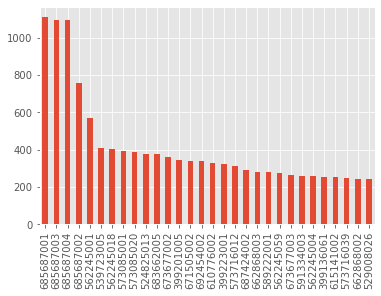

In [7]:
# Plot the most frequently bought products as bar plot
popular_products.head(30).plot(kind = "bar")

We could add something where we check which products are the most profitable and only recommend the most popular of those...

**Collaborative filtering for products frequently-bought-together**

In [8]:
# Reshape the data counting how many times each product has been bought by each customer
transactions1 = transactions.head(10000) # I really need to use this subset of data because the original data set is too big and the computer crashes
data = pd.melt(transactions1.set_index('customer_id')['article_id'].apply(pd.Series).reset_index(), 
             id_vars=['customer_id'],
             value_name='products') \
    .dropna().drop(['variable'], axis=1) \
    .groupby(['customer_id', 'products']) \
    .agg({'products': 'count'}) \
    .rename(columns={'products': 'purchase_count'}) \
    .reset_index() \
    .rename(columns={'products': 'article_id'})
data['article_id'] = data['article_id'].astype(np.int64)
print("done")

done


In [9]:
data.head()

,customer_id,article_id,purchase_count
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,1
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,1
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,1
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,1


In [10]:
data.shape

(9035, 3)

In [11]:
# Turn the data into a sparse matrix
utility_matrix = data.pivot_table(values='purchase_count', index='customer_id', columns='article_id', fill_value=0)
utility_matrix.head()

article_id,108775015,108775051,110065001,110065002,111586001,111593001,118458038,118458039,123173001,146721002,...,719017002,719031001,719530004,719610002,720384002,725253001,727754001,728162001,728162002,729931001
customer_id,,,,,,,,,,,,,,,,,,,,,
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
utility_matrix.shape

(2954, 4903)

In [15]:
# Next, transpose the matrix
X = utility_matrix.T
X.head()

customer_id,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280,0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8,001127bffdda108579e6cb16080440e89bf1250a776c6e55f56e35e9ee029a8d,001ea4e9c54f7e9c88811260d954edc059d596147e1cf8adc73323aebf571fd8,001fd23db1109a94bba1319bb73df0b479059027c182da490e1161b34cd3af61,0021da829b898f82269fc51feded4eac2129058ee95bd75bb1591e2eb14ecc79,00228762ecff5b8d1ea6a2e52b96dafa198febddbc3bf350eb611f28e61ea6ce,...,3641d2a07286d1d935a86f9423af81069371c32505d2e6beef9cd164c602a192,3644502c3554e67f5a34eb261db7dc62251dd8a818346620b2e097932fd8e06c,36459d0464b688618112aceeb62141baf824e43e0fd8961e35bacd9a0025b020,364aa00d4411b9b662a8c657979fe5b76f9529cd312e2fc77b9aa591ae0cb3fe,365b758621a45dc8f300c5033432e7753dd819c3f06704a1544e245a81d72417,365bfd22ce4b8aabeb84c847266a80a225b04f188629bf3a7f912e8545ac7643,365d866c4dcfcdf9c7abe4ccd9a0c3beb8e145db7a952424469b865a82da1eb3,36689f5d8b67b19a42fff664ad5e39ca4288bc264e72f7603c5b764b4b3f0b2b,366b89e56112858fd747d2b8ec9519b8c7856d34e546eb827e46ebc37613dab1,366d7effce9489934c3317a8e4e1828622d51f30cee29cf3289edebd0a042807
article_id,,,,,,,,,,,,,,,,,,,,,
108775015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108775051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110065001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110065002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111586001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X.shape

(4903, 2954)

In [18]:
# Dimensionality reduction (this can take a while)
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
print("done")

done


In [19]:
# Just want to take a look at what came out of that...
decomposed_matrix

array([[ 6.69118143e-08, -1.31430986e-07,  1.38957457e-02, ...,
        -2.15283805e-02,  8.83085660e-03, -2.81532169e-03],
       [ 9.69486265e-07,  1.16148374e-09,  2.66048190e-05, ...,
         9.09267424e-05,  6.23627361e-05, -4.34103506e-05],
       [-6.84452578e-15,  2.06996315e-14, -5.86690042e-12, ...,
         1.38599619e-09, -1.08324834e-09,  2.38225757e-09],
       ...,
       [-7.12344601e-15,  3.28261852e-14, -2.00891628e-12, ...,
        -8.93374652e-11, -6.66234356e-10, -3.32132525e-10],
       [ 8.65708066e-13,  3.04397222e-12, -1.92395093e-10, ...,
         6.43594306e-08,  2.56032425e-09, -3.41410303e-07],
       [ 2.25309754e-08, -3.72928915e-08,  2.85390022e-03, ...,
         6.97801787e-03,  4.52772682e-04,  1.57433157e-02]])

In [20]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape
correlation_matrix

array([[ 1.        , -0.0324328 , -0.49439811, ...,  0.11322354,
         0.04303339, -0.16742884],
       [-0.0324328 ,  1.        , -0.35086902, ..., -0.20598036,
         0.80738766, -0.48170591],
       [-0.49439811, -0.35086902,  1.        , ...,  0.17988889,
        -0.6584465 ,  0.69980269],
       ...,
       [ 0.11322354, -0.20598036,  0.17988889, ...,  1.        ,
         0.03763834, -0.02530698],
       [ 0.04303339,  0.80738766, -0.6584465 , ...,  0.03763834,
         1.        , -0.71552241],
       [-0.16742884, -0.48170591,  0.69980269, ..., -0.02530698,
        -0.71552241,  1.        ]])

Now we have everything we need for a recommender system. I will choose now a random article and get some recommendations for customers who have bought that article. 

In [21]:
X.index[10] # Get the article_id of item number 99 from the matrix (that was not yet decomposed)

148033001

In [22]:
# If I have a product_id to start with, I can find it's index in the matrix like this: 
i = 148033001 # a random product_id
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID # this is going to give me the position in the matrix now

10

In [23]:
# Get the correlation scores of all the products with that randomly chosen product_id
correlation_product_ID = correlation_matrix[11]
correlation_product_ID

array([-0.45232334,  0.79929042, -0.31481463, ..., -0.17967516,
        0.77141566, -0.46645389])

In [24]:
# Recommending top 10 highly correlated products in sequence
Recommend = list(X.index[correlation_product_ID > 0.90])

Recommend

[153115019,
 370868012,
 592291002,
 611216001,
 625927004,
 633130007,
 653431003,
 655434002,
 673771003,
 717130004]

So, the customer bought this item: 
<div>
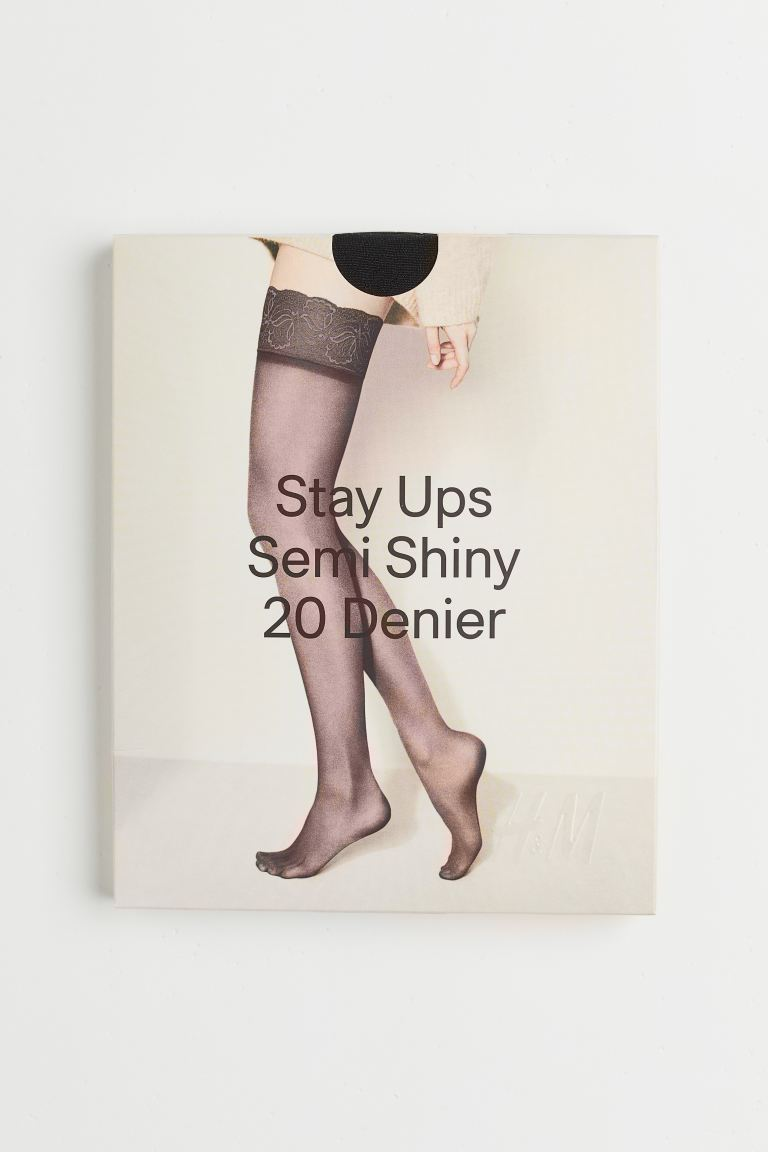
</div>

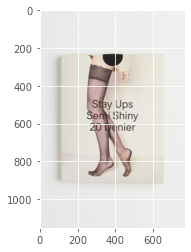

In [3]:
img_D = mpimg.imread('/Users/stefaniesturm/capstone_project/148033001.png')
imgplot = plt.imshow(img_D)

(-0.5, 395.5, 593.5, -0.5)

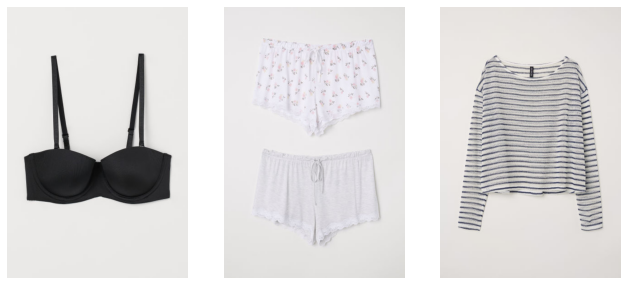

In [47]:
# read images
img_A = mpimg.imread('/Users/stefaniesturm/capstone_project/592291002.jpg')
img_B = mpimg.imread('/Users/stefaniesturm/capstone_project/370868012.jpg')
img_C = mpimg.imread('/Users/stefaniesturm/capstone_project/153115019.jpg')

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_C)
ax[0].axis('off')
ax[1].imshow(img_B)
ax[1].axis('off')
ax[2].imshow(img_A)
ax[2].axis('off')